а

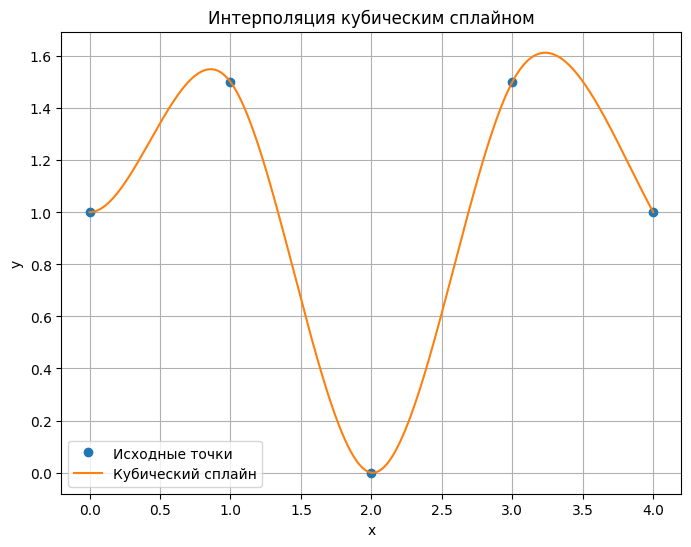

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Заданные точки (x, y)
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 1.5, 0, 1.5, 1])

# Заданные производные на концах
dry_dx_start = 0  # Производная в x[0]
dry_dx_end = -1.0   # Производная в x[-1]

# Создание кубического сплайна с учетом производных
cs = CubicSpline(x, y, bc_type=((1, dry_dx_start), (1, dry_dx_end)))

# Генерация плотных точек для графика
x_dense = np.linspace(min(x), max(x), 500)
y_dense = cs(x_dense)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Исходные точки')
plt.plot(x_dense, y_dense, '-', label='Кубический сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция кубическим сплайном')
plt.legend()
plt.grid()
plt.show()


g

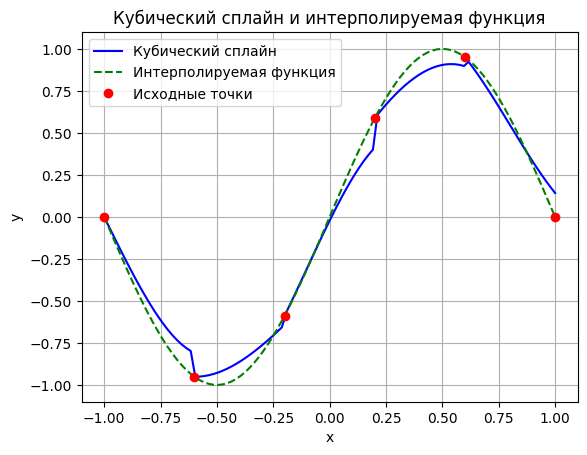

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Равномерное разбиение
n = 6  # Количество точек
x = np.linspace(-1, 1, n)

# Произвольные ординаты (например, синусоидальная функция)
y = np.sin(np.pi * x)  # Интерполируемая функция

# Расстояние между точками
h = np.diff(x)  # Разности x (расстояние между точками)

# Система для решения сплайна
A = np.zeros((n-2, n-2))  # Система для второй производной
b = np.zeros(n-2)

# Строим систему для второго производного (естественный сплайн)
for i in range(1, n-1):
    if i > 1:
        A[i-1, i-2] = h[i-1]  # Диагональ ниже главной
    A[i-1, i-1] = 2 * (h[i-1] + h[i])  # Главная диагональ
    if i < n-2:
        A[i-1, i] = h[i]  # Диагональ выше главной
    b[i-1] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

# Решение для второй производной
M = np.linalg.solve(A, b)

# Массив для второй производной
M_full = np.concatenate(([0], M, [0]))  # Условия для концов (естественный сплайн)

# Функция для вычисления значений кубического сплайна
def cubic_spline(x_new):
    for i in range(n-1):
        if x_new >= x[i] and x_new <= x[i+1]:
            dx = x_new - x[i]
            a = (M_full[i+1] - M_full[i]) / (3 * h[i])  # Коэффициент a
            b = M_full[i] / 2  # Коэффициент b
            c = (y[i+1] - y[i]) / h[i] - (2 * M_full[i] + M_full[i+1]) * h[i] / 6  # Коэффициент c
            d = y[i]  # Коэффициент d
            return a * dx**3 + b * dx**2 + c * dx + d

# Построение графиков
x_vals = np.linspace(-1, 1, 100)
y_vals_spline = [cubic_spline(xi) for xi in x_vals]
y_vals_function = np.sin(np.pi * x_vals)  # Интерполируемая функция

plt.plot(x_vals, y_vals_spline, label='Кубический сплайн', color='blue')
plt.plot(x_vals, y_vals_function, label='Интерполируемая функция', color='green', linestyle='--')
plt.plot(x, y, 'ro', label='Исходные точки')
plt.legend()
plt.title('Кубический сплайн и интерполируемая функция')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
